In [ ]:
#Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import warnings


In [ ]:
import pandas as pd

# Load the dataset
dataset = pd.read_excel('/content/ecom customer_data.xlsx')

# Display the first few rows of the dataset to understand its structure
dataset.head()


,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [ ]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [ ]:
df = dataset


In [ ]:
print(df.shape)
print(df.isna().sum())


(30000, 38)
Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger             

In [ ]:
#Filling the missing null values with the mode of Gender
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])


In [ ]:
#Descriptive analysis of the data
print(df.describe())


            Cust_ID        Orders        Jordan      Gatorade       Samsung  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000      4.169800      0.267433      0.252333      0.222933   
std     8660.398374      3.590311      0.804778      0.705368      0.917494   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%     7500.750000      1.000000      0.000000      0.000000      0.000000   
50%    15000.500000      4.000000      0.000000      0.000000      0.000000   
75%    22500.250000      7.000000      0.000000      0.000000      0.000000   
max    30000.000000     12.000000     24.000000     15.000000     27.000000   

               Asus          Udis  Mondelez International      Wrangler  \
count  30000.000000  30000.000000            30000.000000  30000.000000   
mean       0.161333      0.143533                0.139767      0.106933   
std        0.740038      0.641258                0.525840      

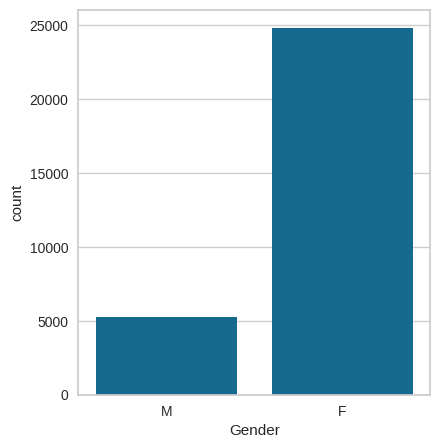

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Gender')
plt.show()


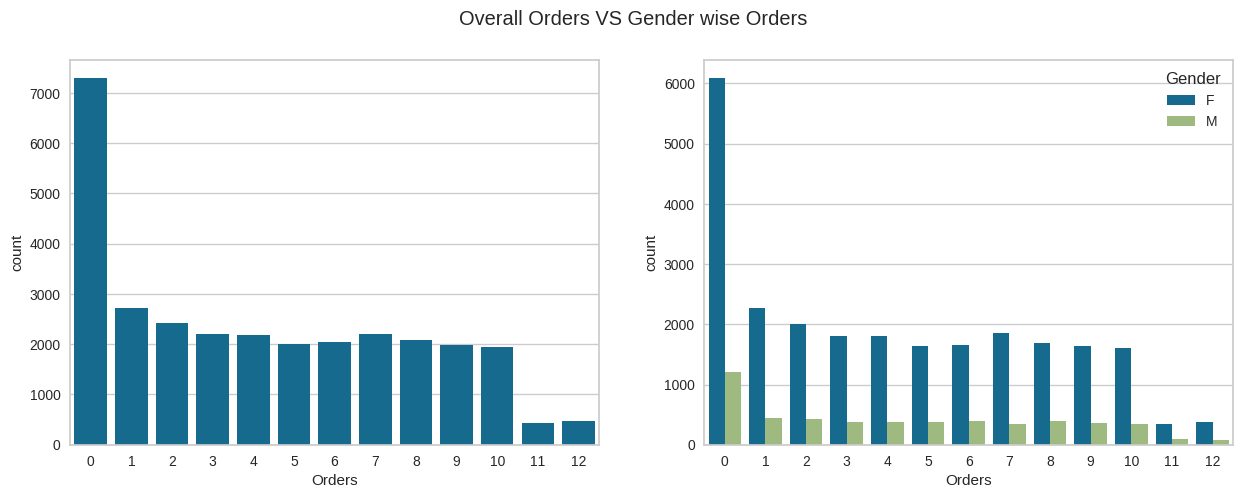

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=df, x='Orders')

#Order count by each number
plt.subplot(1,2,2)
sns.countplot(data=df, x='Orders', hue='Gender')
plt.suptitle("Overall Orders VS Gender wise Orders")
plt.show()


In [ ]:
# Sum of all brand columns for each row
brand_columns = df.columns[3:]  # Excluding Cust_ID, Gender, and Orders
df['Total_Searches'] = df[brand_columns].sum(axis=1)

# Display the first few rows to verify the changes
df.head()


,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total_Searches
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,2,F,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,18
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,5
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,5,F,10,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,16


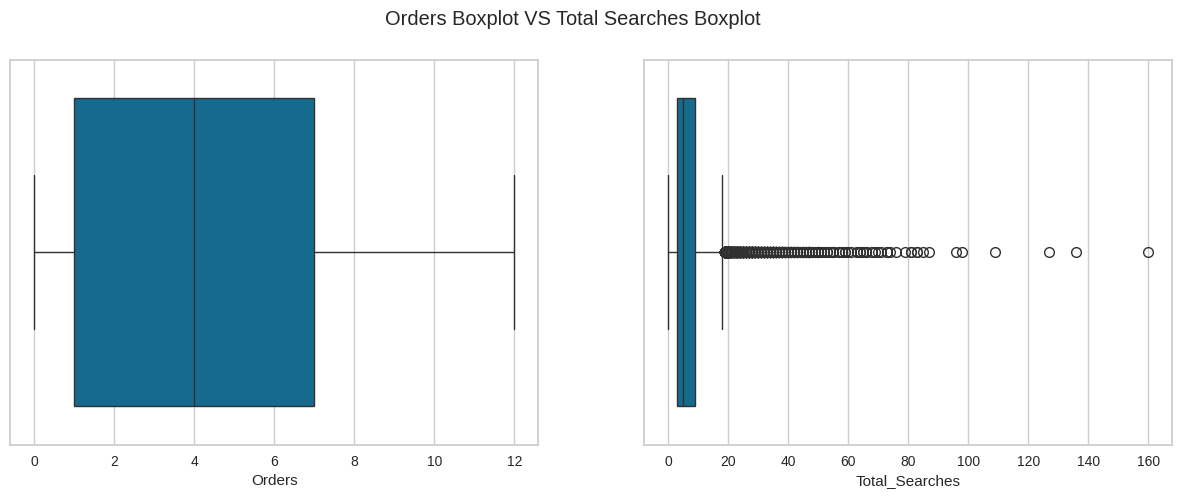

In [ ]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Orders')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Total_Searches')
plt.suptitle("Orders Boxplot VS Total Searches Boxplot")
plt.show()


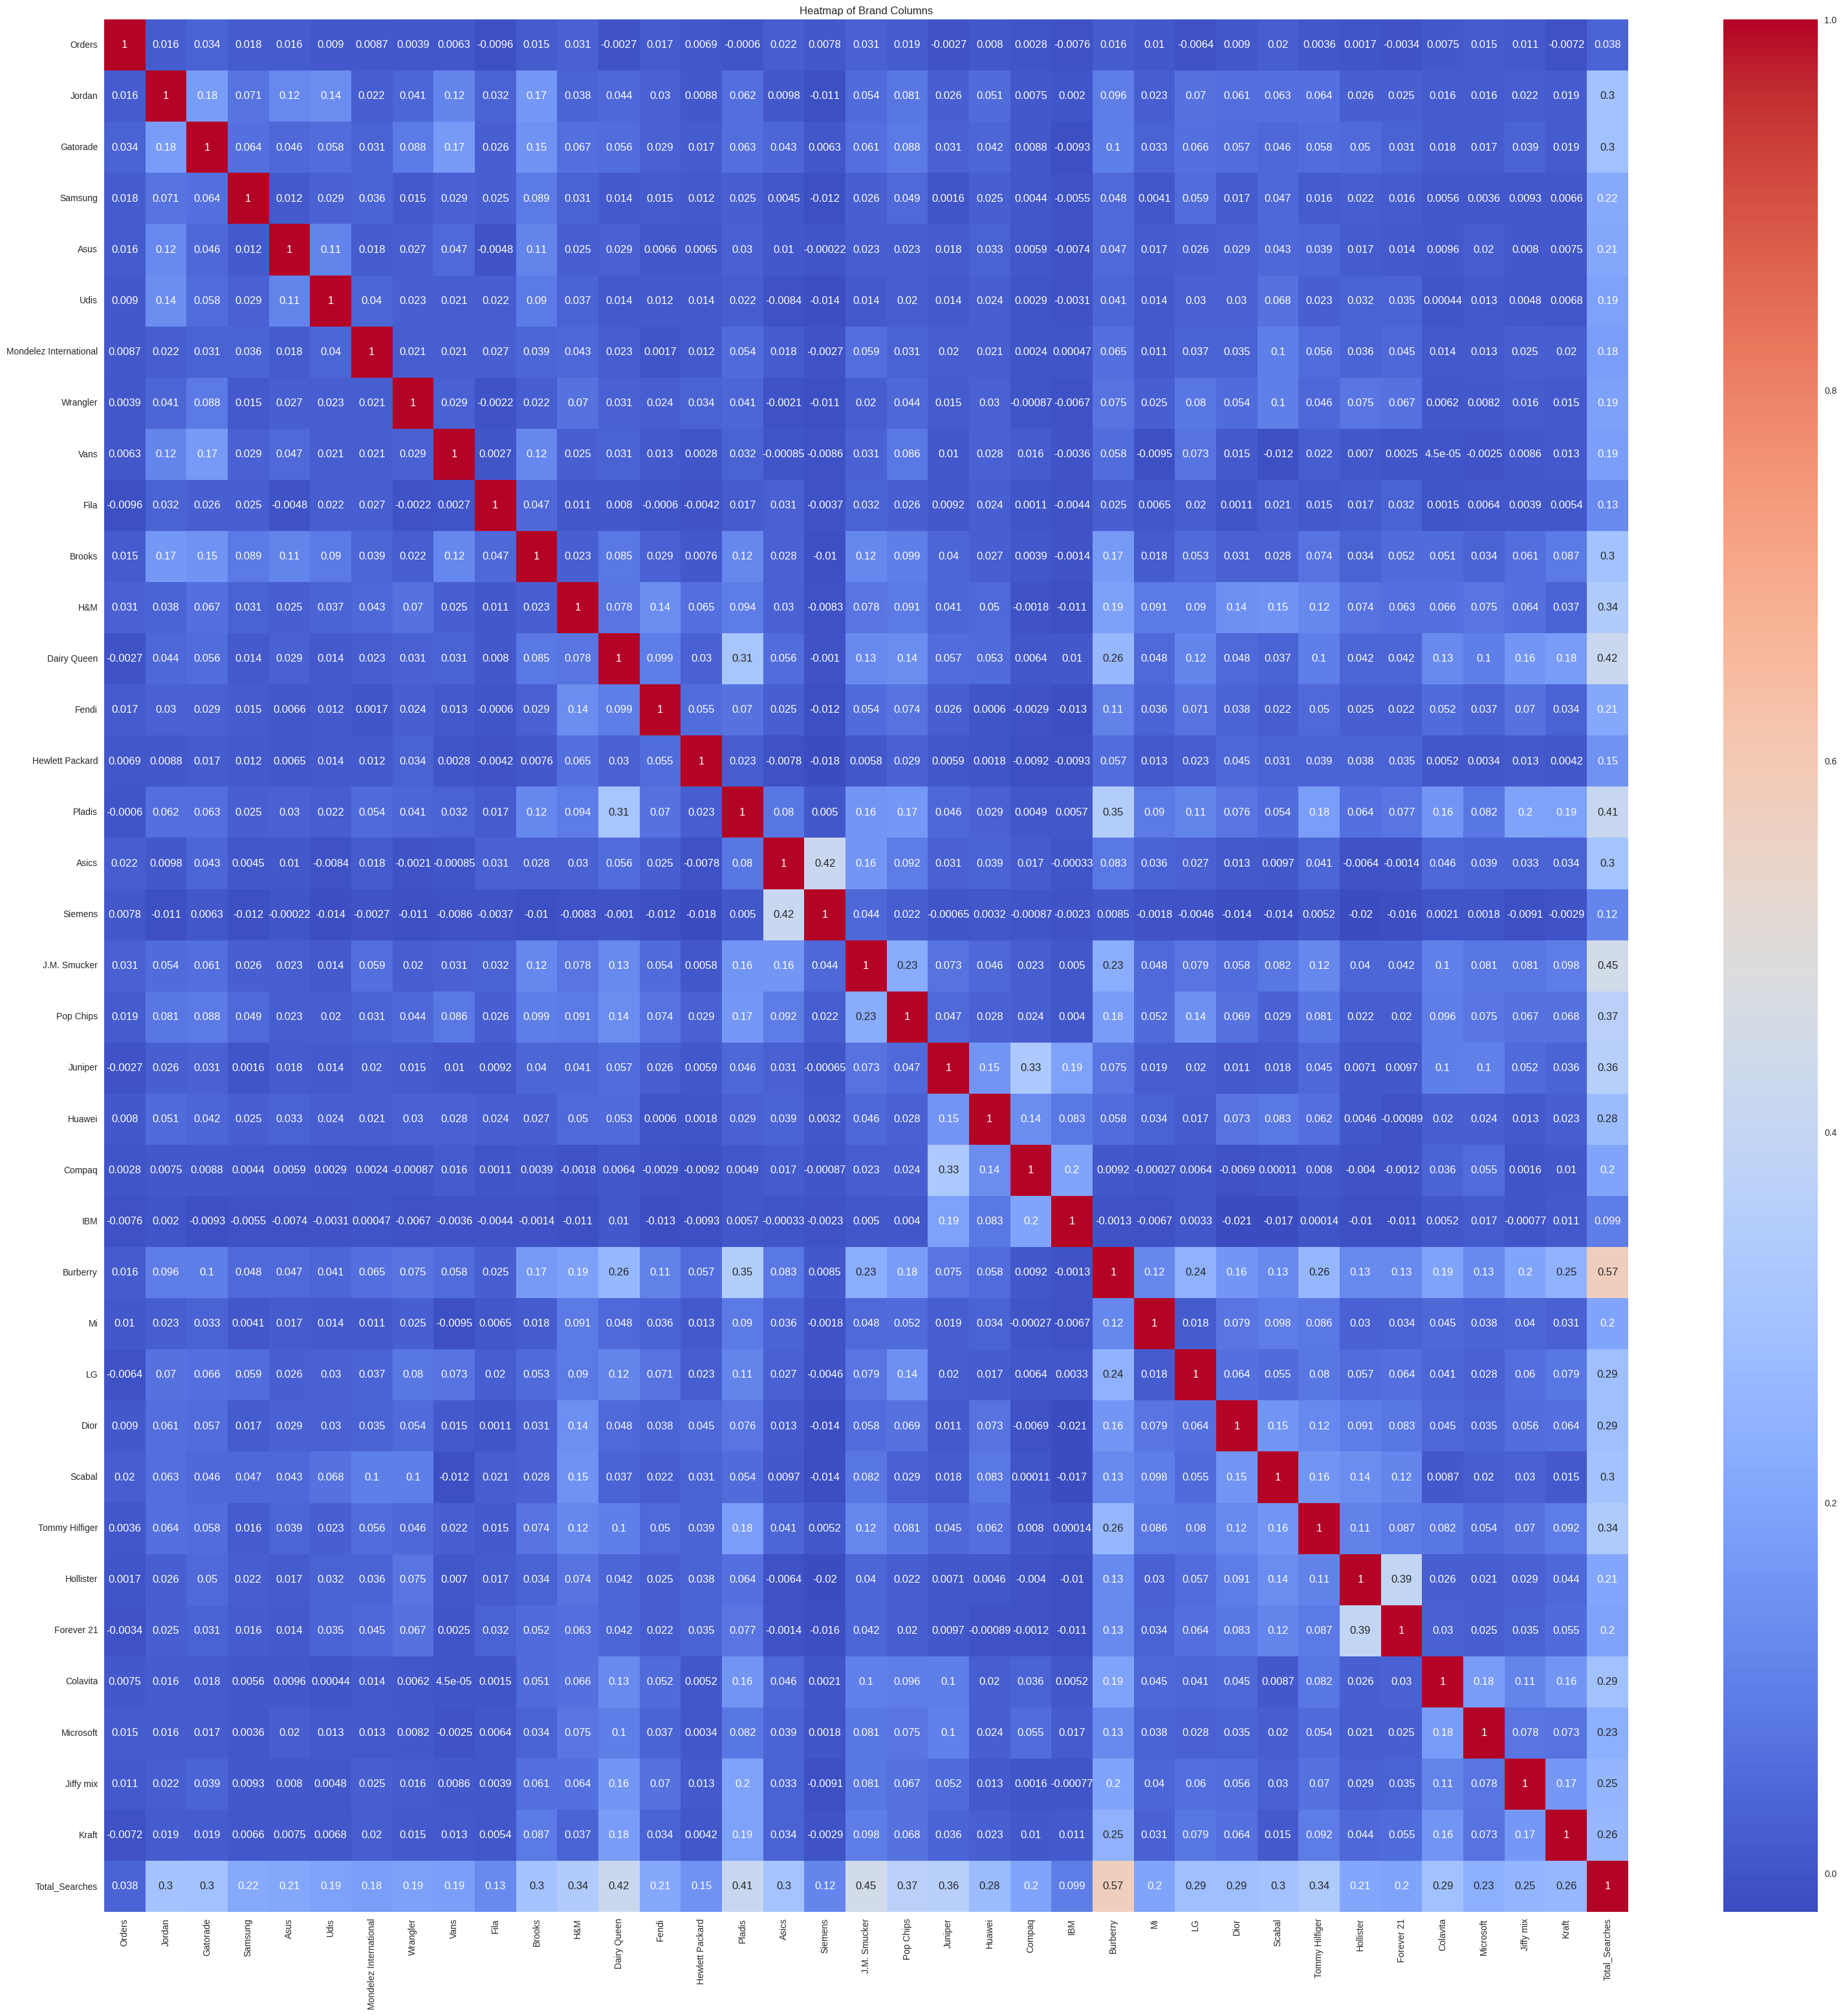

In [ ]:
brand_columns = df.columns[2:]  # Excluding Cust_ID, Gender, and Orders

#Heatmap to understand the correlation
plt.figure(figsize=(38, 38))
sns.heatmap(dataset[brand_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Brand Columns')
plt.show()


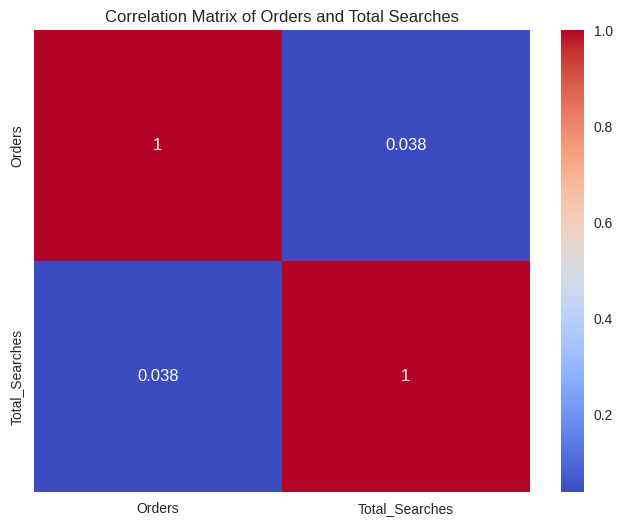

In [ ]:
correlation_matrix = df[['Orders', 'Total_Searches']].corr()

# Heatmap of the correlation matrix of Orders and Total Searches
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Orders and Total Searches')
plt.show()


In [ ]:
features_to_scale = df.drop(columns=['Cust_ID', 'Total_Searches', 'Gender']) # Drop the 'Gender' column

# Apply MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features_to_scale)

# Update the dataset with scaled values
scaled_dataset = pd.DataFrame(scaled_features, columns=features_to_scale.columns)
scaled_dataset['Cust_ID'] = dataset['Cust_ID']
scaled_dataset['Gender'] = dataset['Gender'] # Add the 'Gender' column back

scaled_dataset.head()

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Cust_ID,Gender
0,0.583333,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.125,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000,1,M
1,0.000000,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000,2,F
2,0.583333,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.071429,0.000,0.0000,3,M
3,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000,4,F
4,0.833333,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.181818,0.0,0.0,0.0,0.0,0.000000,0.125,0.0625,5,F


In [ ]:
# Settings the warnings to be ignored
warnings.filterwarnings('ignore')

# Determine the optimal number of clusters using the elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(scaled_dataset)
    inertia.append(kmeans.inertia_)


In [ ]:
# Settings the warnings to be ignored
warnings.filterwarnings('ignore')

# Drop non-numerical columns before scaling
features_to_scale = df.drop(columns=['Cust_ID', 'Total_Searches', 'Gender'])

# Apply MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features_to_scale)

# Update the dataset with scaled values
scaled_dataset = pd.DataFrame(scaled_features, columns=features_to_scale.columns)

# Determine the optimal number of clusters using the elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    # Fit KMeans on the scaled numerical features only
    kmeans.fit(scaled_dataset)
    inertia.append(kmeans.inertia_)

Text(0.5, 0.98, 'Elbow Graph and Elbow Visualizer')

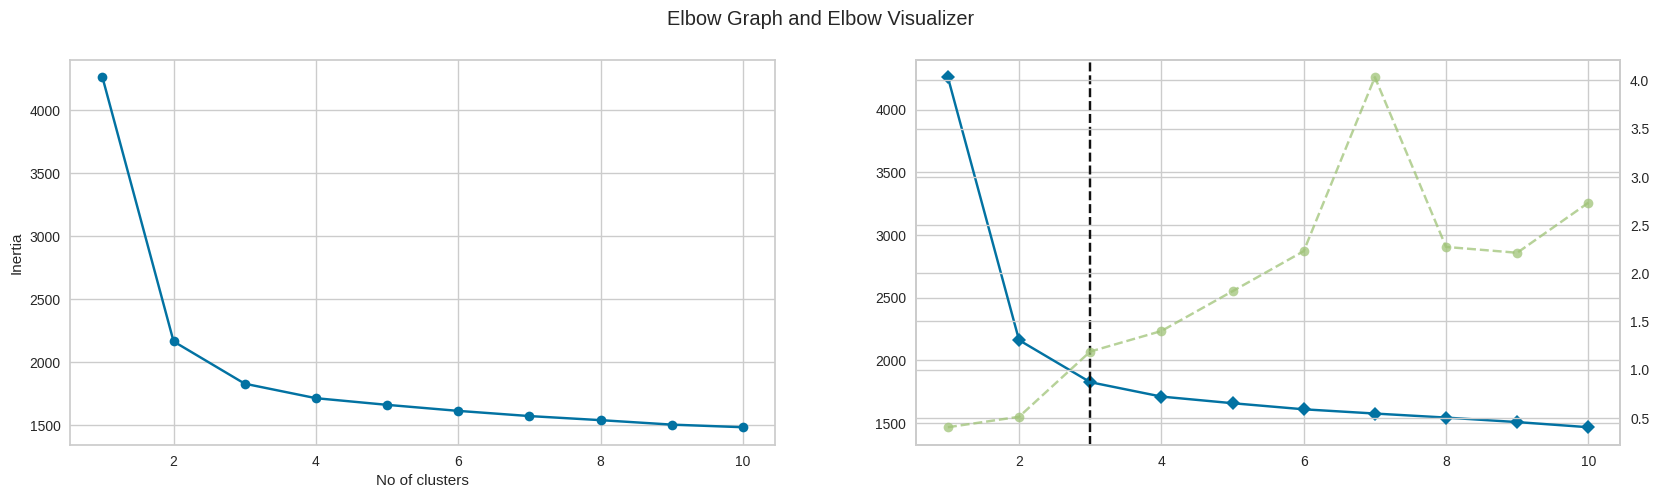

In [ ]:
# Settings the warnings to be ignored
warnings.filterwarnings('ignore')

# Elbow Graph
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), inertia, 'bo-')
plt.xlabel('No of clusters'), plt.ylabel('Inertia')

# KElbow Visualizer
plt.subplot(1, 2, 2)
kmeans = KMeans()
visualize = KElbowVisualizer(kmeans, k=(1, 11))
visualize.fit(scaled_dataset)
plt.suptitle("Elbow Graph and Elbow Visualizer")


In [ ]:
# Settings the warnings to be ignored
warnings.filterwarnings('ignore')

# Finding Silhouette Score for each K value
silhouette_avg = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i)
    cluster_labels = kmeans.fit_predict(scaled_dataset)
    silhouette_avg.append(silhouette_score(scaled_dataset, cluster_labels))


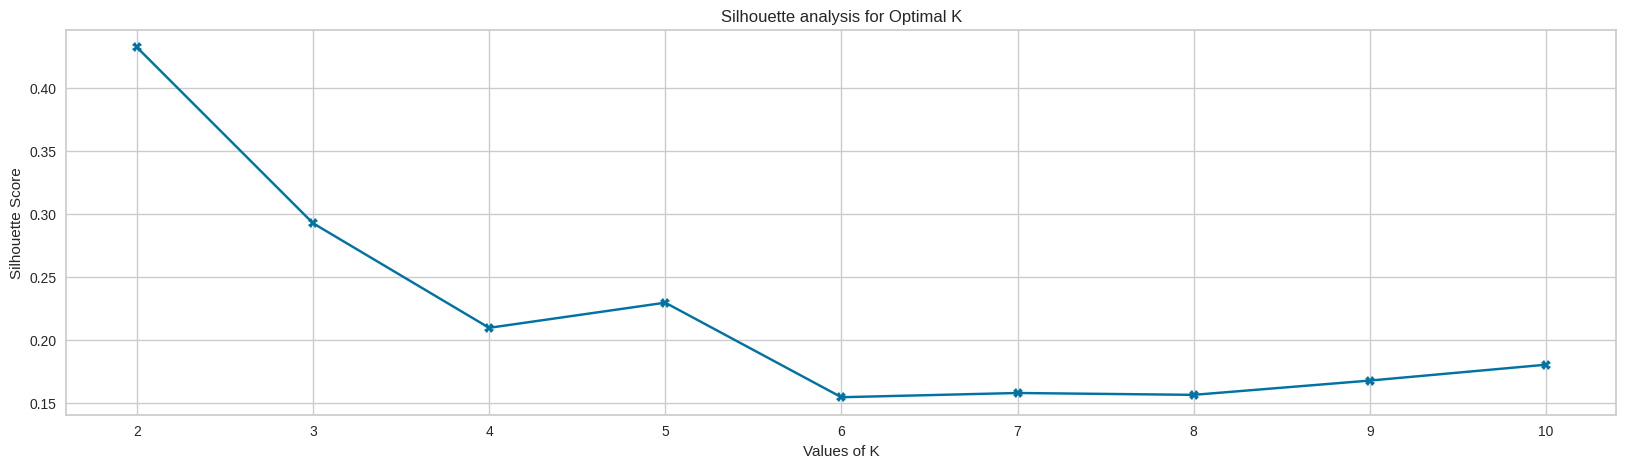

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(range(2, 11), silhouette_avg, 'bX-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette analysis for Optimal K')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
# Fit KMeans on the scaled dataset (Cust_ID was already removed before scaling)
clusters = kmeans.fit_predict(scaled_dataset)
df['Cluster'] = clusters

# Display the first few rows with the cluster assignments
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total_Searches,Cluster
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
1,2,F,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,18,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,5,1
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
4,5,F,10,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,1,16,1


In [ ]:
# Looking at each cluster
from IPython.display import display
for i in range(3):
    print('For Cluster : ', i)
    display(df[df['Cluster'] == i])


For Cluster :  0


,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total_Searches,Cluster
1,2,F,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,18,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
8,9,F,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
9,10,F,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,14,0
13,14,F,0,0,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,29995,M,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
29995,29996,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
29996,29997,M,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
29997,29998,M,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0


For Cluster :  1


,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total_Searches,Cluster
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,5,1
4,5,F,10,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,1,16,1
7,8,M,9,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,6,1
10,11,F,8,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29978,29979,F,8,0,0,1,0,0,0,0,...,1,0,0,0,2,0,0,0,15,1
29979,29980,F,9,0,3,0,0,0,0,1,...,1,0,0,0,1,1,1,1,43,1
29982,29983,F,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
29984,29985,F,11,2,0,4,0,0,0,0,...,1,0,0,0,0,0,0,0,15,1


For Cluster :  2


,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total_Searches,Cluster
5,6,F,4,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,7,2
6,7,F,6,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,6,2
11,12,F,4,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
12,13,F,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
16,17,F,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29976,29977,F,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,2
29980,29981,F,3,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,2
29987,29988,M,5,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,3,2
29991,29992,F,4,3,0,0,0,0,2,0,...,1,0,0,0,1,1,0,0,17,2
